In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
# from notebooks.utils import display

In [4]:
#parameters
NUM_CLASSES = 10

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 60s 0us/step


In [18]:
# x_train has 50,000 images of 32X32 pixels and 3 channels (RGB)
# y_train has 50,000 output numbered between 0-9 for 10 classes
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [21]:
# Example 2-2. The green channel (1) value of the pixel in the (12,13) position of image 54
x_train[54, 12, 13, 1]
# 0.36862746

0.36862746

In [19]:
# scaling input and OHE output 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [22]:
# defining model 
input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200,activation='relu')(x)
x = layers.Dense(units=150,activation='relu')(x)
output_layer = layers.Dense(units=10,activation='softmax')(x)
model = models.Model(input_layer,output_layer)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
opt = optimizers.legacy.Adam(learning_rate=0.0005)

In [30]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [31]:
model.fit(x_train
, y_train
, batch_size = 32
, epochs = 10
, shuffle = True
)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8532 - accuracy: 0.3397
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6662 - accuracy: 0.4054
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5860 - accuracy: 0.4334
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5360 - accuracy: 0.4547
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4865 - accuracy: 0.4701
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4614 - accuracy: 0.4812
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4306 - accuracy: 0.4925
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4087 - accuracy: 0.4990
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3906 - accuracy: 0.5053
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.369

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.4371 - accuracy: 0.4947


[1.4370715618133545, 0.49470001459121704]

In [33]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
, 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 0s 610us/step


In [40]:
preds_single

array(['cat', 'ship', 'truck', ..., 'dog', 'cat', 'horse'], dtype='<U10')

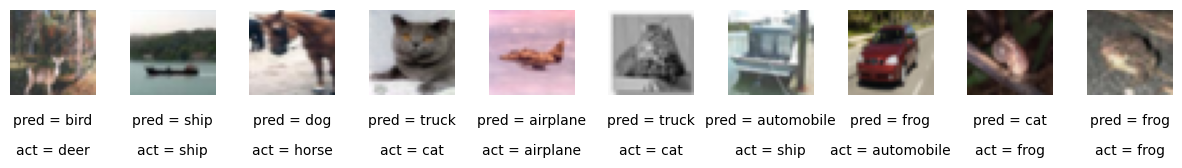

In [51]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
    , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
    , ha='center', transform=ax.transAxes)
    ax.imshow(img)